# Online shoppers purchasing intension

# TABLE OF CONTENT
### 1 Introduction
### 2 Goal Of the Project
### 3 Data Story
### 4 Data Preprocessing 

# 1.Introduction

 The Online Shoppers Intention dataset provides session-level data from an e-commerce website, capturing both behavioral and technical attributes such as page interaction durations, bounce and exit rates, traffic sources, and temporal features like month and visitor type. The target variable Revenue indicates whether a user completed a purchase during their visit.
 This project follows a complete data analysis pipeline, starting with data cleaning, exploratory data analysis (EDA), and feature preprocessing. Categorical features are encoded, numerical features are transformed using Yeo-Johnson to correct skewness, and SMOTE is applied to handle class imbalance. Important features are selected using statistical methods, and the dataset is normalized using StandardScaler.

 A range of machine learning classification models are implemented, including Logistic Regression, Decision Tree, Random Forest, Support Vector Classifier (SVC), Naive Bayes, K-Nearest Neighbors (KNN), and Gradient Boosting. Each model is evaluated using accuracy, precision, recall, F1-score, and ROC-AUC metrics. The goal is to identify the most effective model and the key features that influence online purchase behavior, providing actionable insights for optimizing marketing and user experience strategies in e-commerce.

# 2 Goal Of the Project

Can we predict whether an online shopper will make a purchase based on their browsing behavior and session characteristics?

# 3 Data Story

The dataset used in this project is the Online Shoppers Purchasing Intention Dataset, originally published on the UCI Machine Learning Repository.

    The data consists of 12,330 records and 18 features, including both numeric and categorical variables that describe user behavior during each session.

    Each row in the dataset represents a user session, with features such as the number of pages visited in different sections (Administrative, Informational, ProductRelated), the duration spent on each, bounce and exit rates, traffic source, month of the visit, visitor type, and whether the session occurred on a weekend. The target variable, Revenue, is a binary indicator of whether the session resulted in a purchase.

# 4 Data Preprocessing

In [198]:
import warnings
warnings.filterwarnings("ignore")

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import yeojohnson
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from PIL import Image

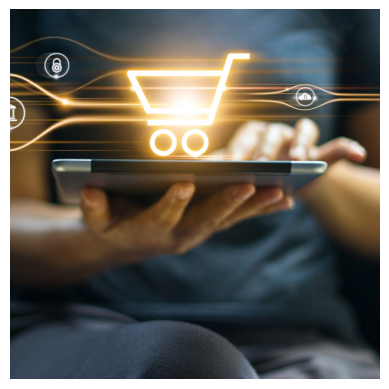

In [200]:
# Load dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\online shoppers purchasing intention dataset.zip")

# Load image
img = Image.open("C:\\Users\\user\\Desktop\\dataset-card.jpg")

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

In [201]:
# Display the first few rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [202]:
# Display dataset shape
print("\nDataset Shape:")
df.shape


Dataset Shape:


(12330, 18)

In [203]:
# Display dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traffic

In [204]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [205]:
# Check data types
print("Data Types:\n", df.dtypes)


Data Types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [206]:
# Select categorical columns dynamically
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Display unique values for categorical columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Month':
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

Unique values in 'VisitorType':
['Returning_Visitor' 'New_Visitor' 'Other']


In [207]:
df[['Revenue', 'Weekend']] = df1[['Revenue', 'Weekend']].astype(int)
print(df[['Revenue', 'Weekend']].dtypes)

Revenue    int32
Weekend    int32
dtype: object


In [208]:
# Numerical column and Categorical column

# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)
print(len(categorical_columns))  # Counts the number of items in the list
print(len(numerical_columns))    # Counts the number of items in the list

Categorical Columns: ['Month', 'VisitorType']
Numerical Columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
2
14


In [209]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### There is no missing value.No imputation required.

In [211]:
# Check for duplicate rows
print("Number of Duplicate Rows: ")
df.duplicated().sum()


Number of Duplicate Rows: 


125

In [212]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [213]:
# Verify the dataset after removing duplicates
print("Dataset shape after removing duplicates:")
df_cleaned

Dataset shape after removing duplicates:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [214]:
df_cleaned.shape

(12205, 18)

In [215]:
df2=df_cleaned.copy()

In [216]:
# Display statistical summary
print("\nStatistical Summary:")
df2.describe()


Statistical Summary:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904,0.234248,0.156329
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654,0.423545,0.363182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [217]:
# Display statistical summary of Categorical columns
print("\nStatistical Summary:")
df2.describe(include='object')


Statistical Summary:


,Month,VisitorType
count,12205,12205
unique,10,3
top,May,Returning_Visitor
freq,3329,10431


In [218]:
# Calculate skewness for numerical columns
# Select only numeric columns
numerical_cols = df2.select_dtypes(include=['int64','float64'])

# Calculate skewness for numerical columns
skewness = numerical_cols.skew()

# Display the skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
dtype: float64


In [219]:
# Sort skewness values in descending order
skew_asc = skewness.sort_values(ascending=False)

# Display sorted skewness values
print("Skewness of numerical columns (sorted):")
print(skew_asc)

Skewness of numerical columns (sorted):
Informational_Duration     7.540291
ProductRelated_Duration    7.253161
PageValues                 6.350983
Administrative_Duration    5.592152
ProductRelated             4.333419
Informational              4.014173
SpecialDay                 3.285902
Browser                    3.217404
BounceRates                3.162425
ExitRates                  2.234645
OperatingSystems           2.032613
TrafficType                1.958514
Administrative             1.947123
Region                     0.978480
dtype: float64


### dataset's skewness values indicate that most numerical features are positively skewed (right-skewed)

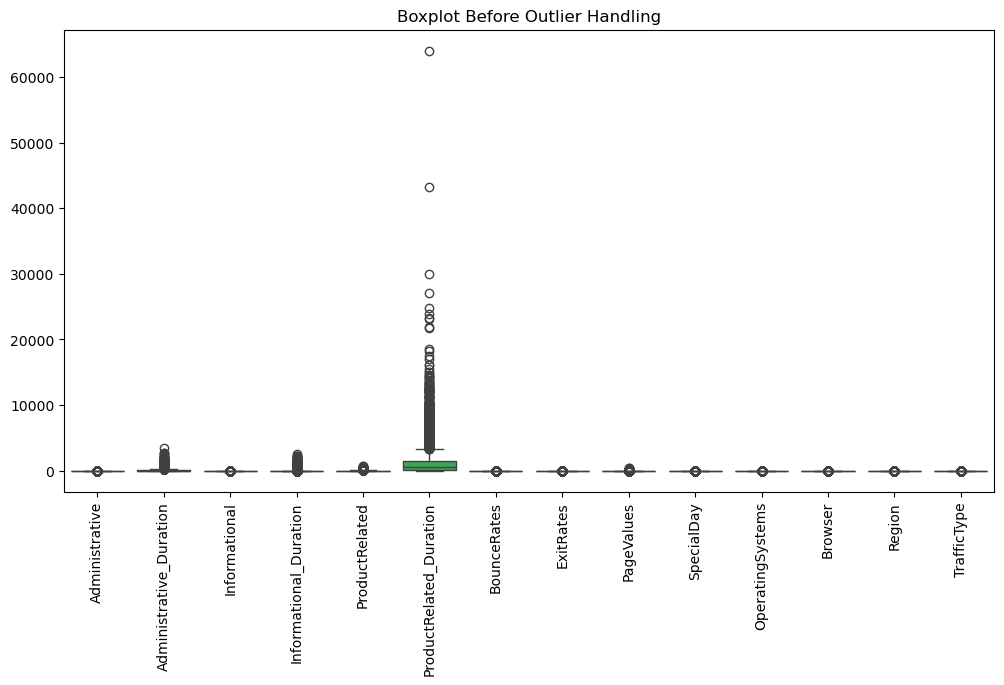

In [221]:
# Select only numerical columns
numerical_cols = df2.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier Handling")
plt.show()

In [222]:
# Function to count outliers using IQR
def count_outliers_iqr(df, columns):
    outlier_counts = {}
    total_outliers = 0

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = outlier_count
        total_outliers += outlier_count

    return outlier_counts, total_outliers

# Get numeric columns
numeric_cols = df2.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Count outliers before capping
initial_outlier_counts, initial_total_outliers = count_outliers_iqr(df2, numeric_cols)

print("Outliers before outlier handling:")
for col, count in initial_outlier_counts.items():
    print(f"Column '{col}' has {count} outliers.")
print(f"\nTotal number of outliers in the dataset: {initial_total_outliers}")

Outliers before outlier handling:
Column 'Administrative' has 404 outliers.
Column 'Administrative_Duration' has 1149 outliers.
Column 'Informational' has 2631 outliers.
Column 'Informational_Duration' has 2405 outliers.
Column 'ProductRelated' has 1007 outliers.
Column 'ProductRelated_Duration' has 951 outliers.
Column 'BounceRates' has 1428 outliers.
Column 'ExitRates' has 1325 outliers.
Column 'PageValues' has 2730 outliers.
Column 'SpecialDay' has 1249 outliers.
Column 'OperatingSystems' has 107 outliers.
Column 'Browser' has 4322 outliers.
Column 'Region' has 505 outliers.
Column 'TrafficType' has 2084 outliers.

Total number of outliers in the dataset: 22297


### Use outlier removal method now.

In [224]:
# Remove Outliers Using IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers for all numerical columns
df2_after_outlier_removal=df2.copy()
for col in numerical_cols:
   df2_after_outlier_removal= remove_outliers(df2_after_outlier_removal, col)

# Display shape after outlier removal
print("New Dataset Shape:", df2_after_outlier_removal.shape)

New Dataset Shape: (2581, 18)


### There is a huge dataloss.Therefore instead of outlier removal use capping .This technique is used when you do not want to discard your data points but keeping those extreme values can also impact your analysis.So, you set a threshold for the maximum and the minimum values and then bring the outliers within this range.

In [226]:
df_cap1=df2.copy()
# Function to cap outliers
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping
for col in numeric_cols:
    df_cap1 = cap_outliers(df_cap1, col)


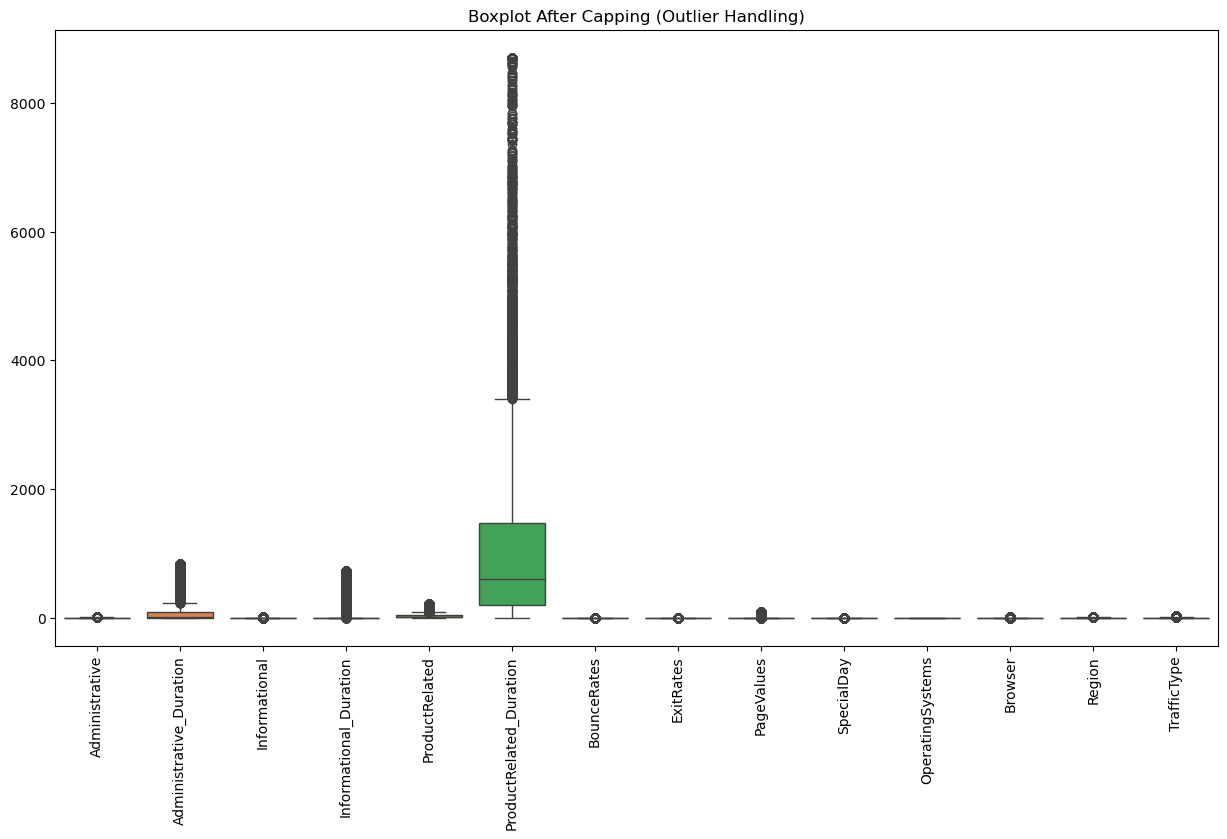

In [227]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cap1[numerical_cols])
plt.xticks(rotation=90) 
plt.title("Boxplot After Capping (Outlier Handling)")
plt.show()
    

In [228]:
# Create a copy of the dataframe to cap
df_cap2 = df2.copy()

# Function to cap outliers
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.05)
    upper_bound = df[column].quantile(0.95)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping
for col in numeric_cols:
    df_cap2 = cap_outliers(df_cap2, col)


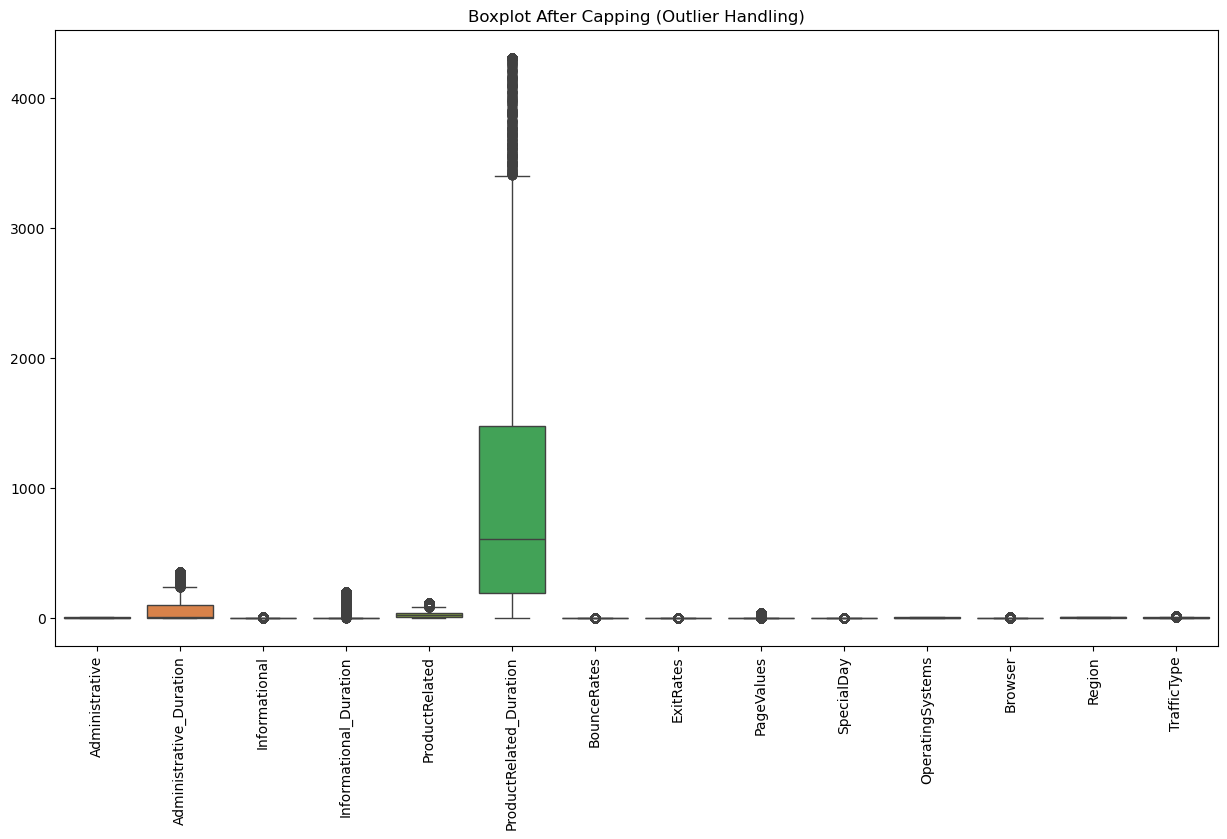

In [229]:
# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cap2[numerical_cols])
plt.xticks(rotation=90) 
plt.title("Boxplot After Capping (Outlier Handling)")
plt.show()
    

In [230]:
print("Shape of dataset before capping: ",df2.shape)
print("Shape of dataset after capping1 and capping2: ",df_cap1.shape,df_cap2.shape)

Shape of dataset before capping:  (12205, 18)
Shape of dataset after capping1 and capping2:  (12205, 18) (12205, 18)


### skewness handling

In [232]:
# Select only numeric columns
numerical_cols1 = df_cap1.select_dtypes(include=['int64','float64'])
numerical_cols2 = df_cap2.select_dtypes(include=['int64','float64'])

# Calculate skewness
skewness1 = numerical_cols1.skew()
skewness2 = numerical_cols2.skew()

# Combine both skewness values into a DataFrame
skew_df = pd.DataFrame({
    'Skewness_after_capping_1': skewness1,
    'Skewness_after_capping_2': skewness2
})

# Sort based on first column (optional)
skew_df = skew_df.sort_values(by='Skewness_after_capping_1',ascending=False)

# Display as table
print("Skewness of Numerical Columns After Capping :")
print(skew_df)

Skewness of Numerical Columns After Capping :
                         Skewness_after_capping_1  Skewness_after_capping_2
Informational_Duration                   4.759086                  2.796893
PageValues                               3.490330                  2.450467
SpecialDay                               3.285902                  2.931270
BounceRates                              3.162425                  2.753482
Administrative_Duration                  3.078041                  1.681086
Browser                                  2.865871                  1.495652
Informational                            2.830675                  2.030582
ProductRelated                           2.608845                  1.503052
ProductRelated_Duration                  2.582071                  1.476022
ExitRates                                2.235722                  1.984381
TrafficType                              1.958514                  1.544710
Administrative                           1

After analyzing the skewness values of numerical features following outlier treatment, it is evident that capping using the 0.05 and 0.95 quantiles (df_cap2) produces more balanced distributions compared to other methods.

In [234]:
# Select only numerical columns (excluding categorical & boolean)
from sklearn.preprocessing import PowerTransformer
numerical_cols = df_cap2.select_dtypes(include=['int64', 'float64']).columns  

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_cap2[numerical_cols] = pt.fit_transform(df_cap2[numerical_cols])

# Convert to DataFrame and check skewness
print(pd.DataFrame(df_cap2, columns=numerical_cols).skew())

Administrative             0.218994
Administrative_Duration    0.115733
Informational              1.386629
Informational_Duration     1.529969
ProductRelated            -0.011526
ProductRelated_Duration   -0.119601
BounceRates                0.915538
ExitRates                  0.402583
PageValues                 1.359529
SpecialDay                 2.624510
OperatingSystems          -0.066395
Browser                    0.009534
Region                     0.120172
TrafficType                0.144634
dtype: float64


In [235]:
# Calculate skewness after transformations
final_skewness = df_cap2[numerical_cols].skew().sort_values(ascending=False)

# Display final skewness values
print("\nFinal Skewness After All Transformations:\n", final_skewness)


Final Skewness After All Transformations:
 SpecialDay                 2.624510
Informational_Duration     1.529969
Informational              1.386629
PageValues                 1.359529
BounceRates                0.915538
ExitRates                  0.402583
Administrative             0.218994
TrafficType                0.144634
Region                     0.120172
Administrative_Duration    0.115733
Browser                    0.009534
ProductRelated            -0.011526
OperatingSystems          -0.066395
ProductRelated_Duration   -0.119601
dtype: float64


### The transformations successfully reduced skewness, making the data more normally distributed and better suited for machine learning models.

In [237]:
df3=df_cap2.copy()

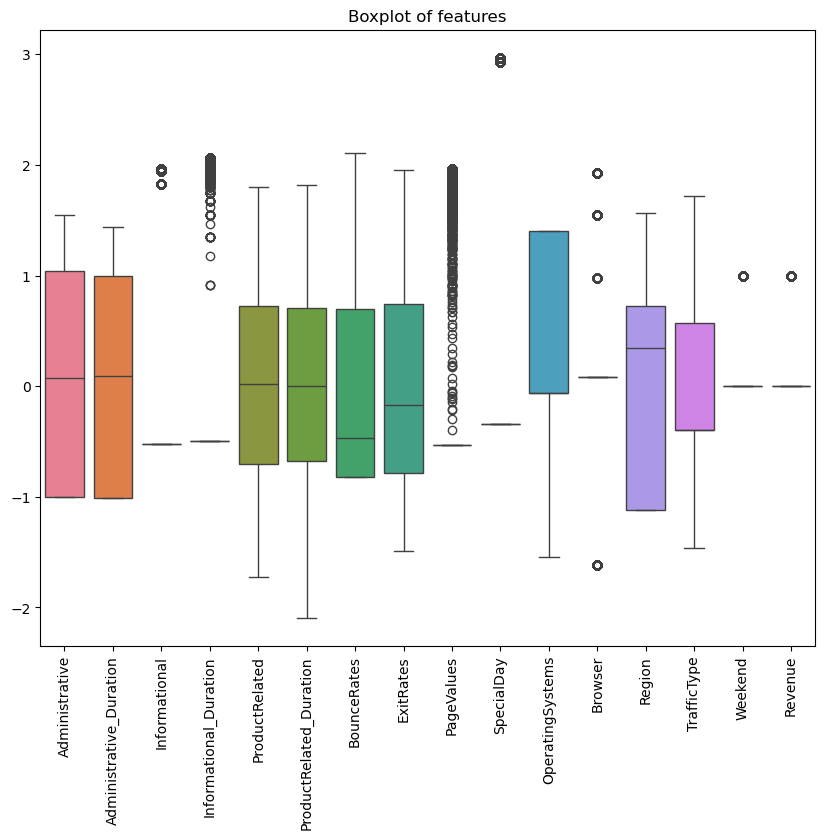

In [238]:
# Visualization of outliers 
plt.figure(figsize=(10, 8))
sns.boxplot(df3)
plt.xticks(rotation=90)
plt.title('Boxplot of features')
plt.show()

## EDA

 ### Univariate Analysis
Examining the distribution of individual variables.

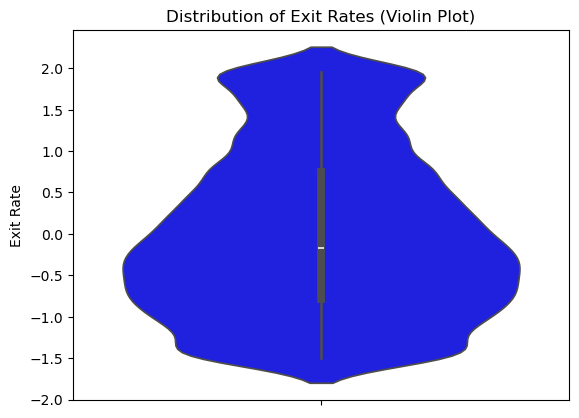

In [241]:
sns.violinplot(y=df3['ExitRates'], color="b")
plt.title("Distribution of Exit Rates (Violin Plot)")
plt.ylabel("Exit Rate")
plt.show()


 #### This violin plot smoothly represents the density of exit rates.
 #### The wider sections indicate areas where most data points are concentrated.
 #### The narrow sections at the bottom and top suggest that fewer values fall in those ranges.

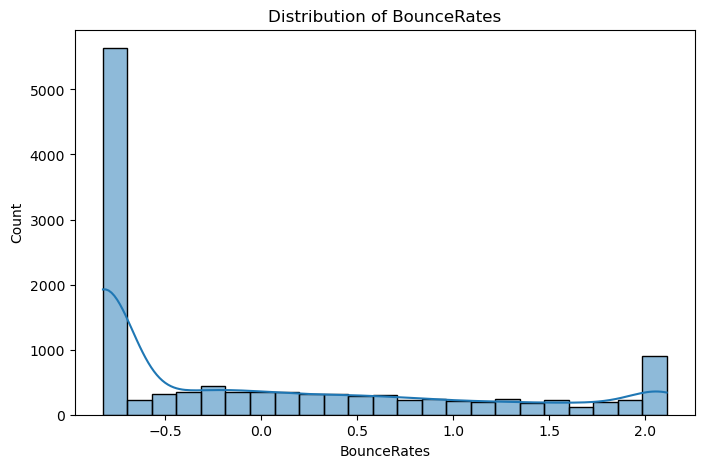

In [243]:
plt.figure(figsize=(8, 5))
sns.histplot(df3['BounceRates'], kde=True)
plt.title("Distribution of BounceRates")
plt.show()

  #### This histogram visualizes the distribution of the BounceRates variable
 #### The right-skewed distribution suggests that high bounce rates are relatively rare.

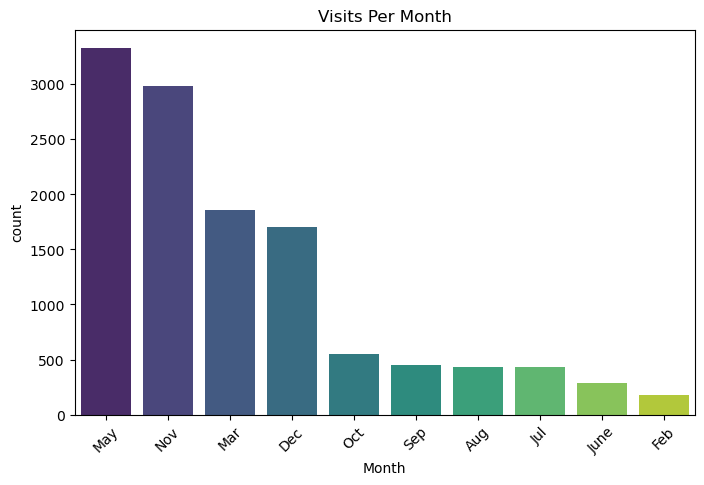

In [245]:
# Bar Plot for Month Column
plt.figure(figsize=(8, 5))
sns.countplot(data=df3, x="Month", palette="viridis", order=df3["Month"].value_counts().index)
plt.title("Visits Per Month")
plt.xticks(rotation=45)
plt.show()

 #### This bar plot visualizes the number of visits per month
 #### May and November have the highest visits:March and December have moderate visits:

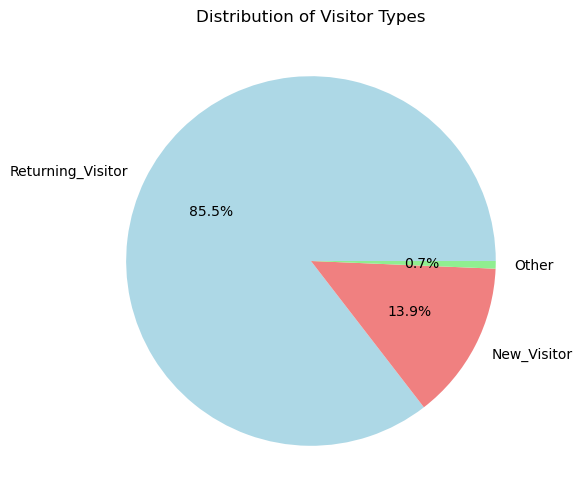

In [247]:
 # Pie Chart: Distribution of Visitor Typesplt.
plt.figure(figsize=(6, 6))
df3["VisitorType"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"])
plt.title("Distribution of Visitor Types")
plt.ylabel("")
plt.show()

 #### A pie chart visualizing the proportion of purchases (Revenue=1) vs. no purchases (Revenue=0).
 #### The majority of sessions do not result in a purchase.


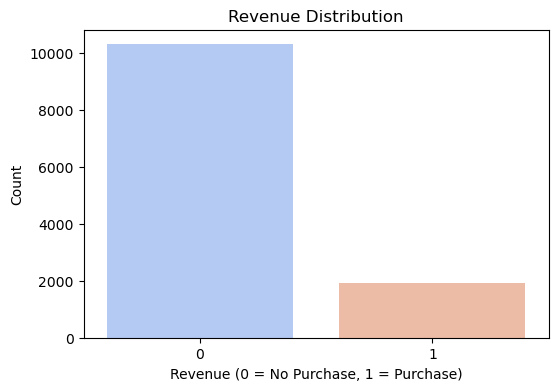

In [249]:
# Count Plot: Revenue Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Revenue", data=df3, palette="coolwarm")
plt.title("Revenue Distribution")
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Count")
plt.show()

# Multivariate Analysis
Exploring relationships between two or more variables.

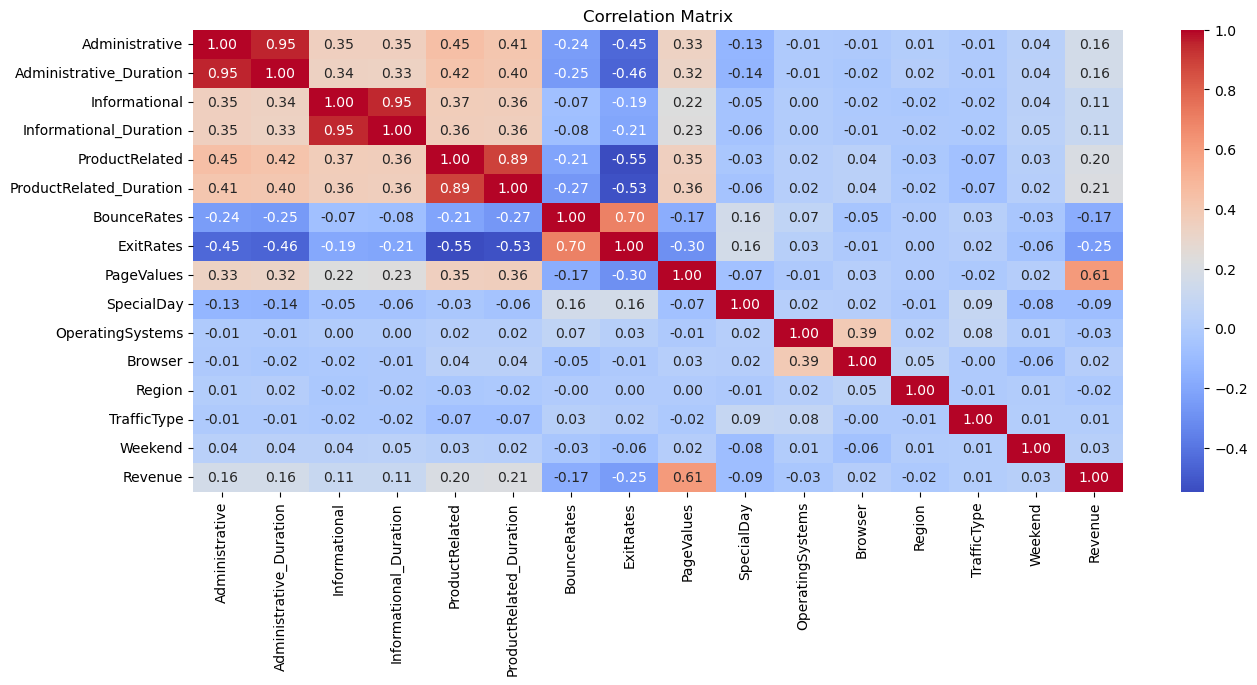

In [251]:
# Visualize correlation matrix
corr = df3.select_dtypes(include=['number']).corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


 #### This visualization shows the correlation between different numerical features in the dataset.
 #### Darker colors (closer to 1 or -1) indicate a strong relationship between variables.

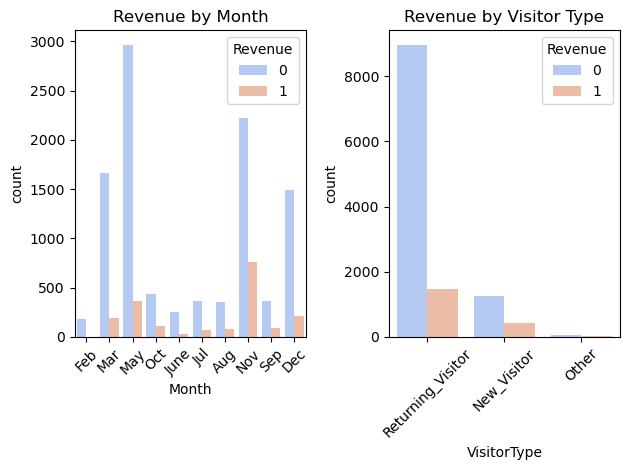

In [253]:
# Revenue vs Month
plt.subplot(1, 2, 1)
sns.countplot(x='Month', hue='Revenue', data=df3, palette="coolwarm")
plt.title("Revenue by Month")
plt.xticks(rotation=45)

# Revenue vs Visitor Type
plt.subplot(1, 2, 2)
sns.countplot(x='VisitorType', hue='Revenue', data=df3, palette="coolwarm")
plt.title("Revenue by Visitor Type")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 #### This visualization consists of two count plots displaying revenue distribution based on Month and Visitor Type.
 #### May and November have the highest number of visits, but a small percentage result in revenue.
 #### Returning Visitors contribute the highest visits and purchases.
 #### New Visitors have fewer visits and even lower revenue generation

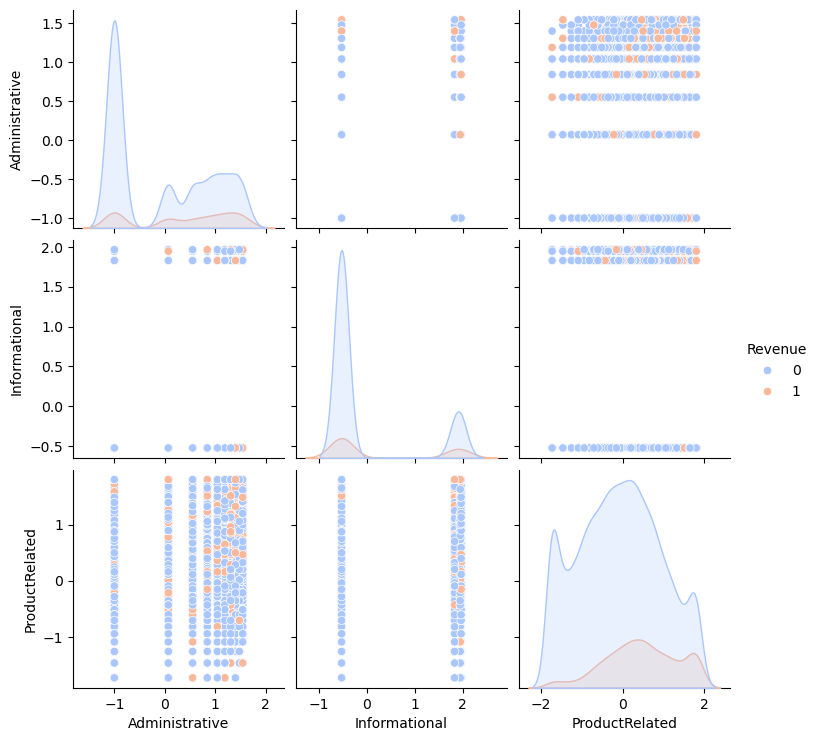

In [255]:
# Pairplot for Feature Relationships
sns.pairplot(df3[['Administrative', 'Informational', 'ProductRelated', 'Revenue']], hue='Revenue', palette="coolwarm")
plt.show()

 #### This Seaborn pairplot visualizes relationships among Administrative, Informational, and ProductRelated features, colored by Revenue (True/False).

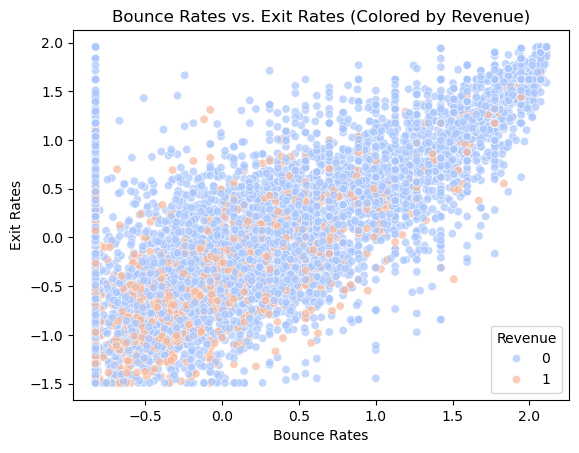

In [257]:
# Scatterplot: Bounce Rates vs. Exit Ratesplt.
sns.scatterplot(x=df3["BounceRates"], y=df3["ExitRates"], hue=df3["Revenue"], palette="coolwarm", alpha=0.7)
plt.title("Bounce Rates vs. Exit Rates (Colored by Revenue)")
plt.xlabel("Bounce Rates")
plt.ylabel("Exit Rates")
plt.show()

 #### This scatter plot visualizes the relationship between Bounce Rates and Exit Rates, with color coding based on Revenue (True/False).
 #### The data shows a general positive correlation between Bounce Rates and Exit Rates, meaning that as bounce rates increase, exit rates also tend to rise.
 #### Most data points are blue, indicating that the majority of sessions do not lead to revenue generation.

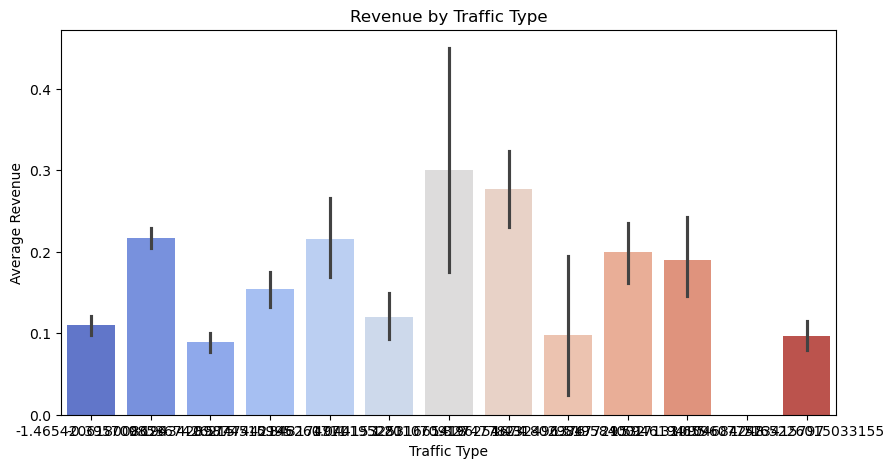

In [259]:
# Bar Chart: Revenue by Traffic Typeplt.
plt.figure(figsize=(10, 5))
sns.barplot(x="TrafficType", y="Revenue", data=df3, palette="coolwarm")
plt.title("Revenue by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Average Revenue")
plt.show()

 #### This bar chart represents the average revenue generated by different traffic types.

 #### This bar chart represents the distribution of purchases (revenue generation) vs. non-purchases.
 #### Since a large portion of users do not convert to purchases
 #### The dataset is highly imbalanced

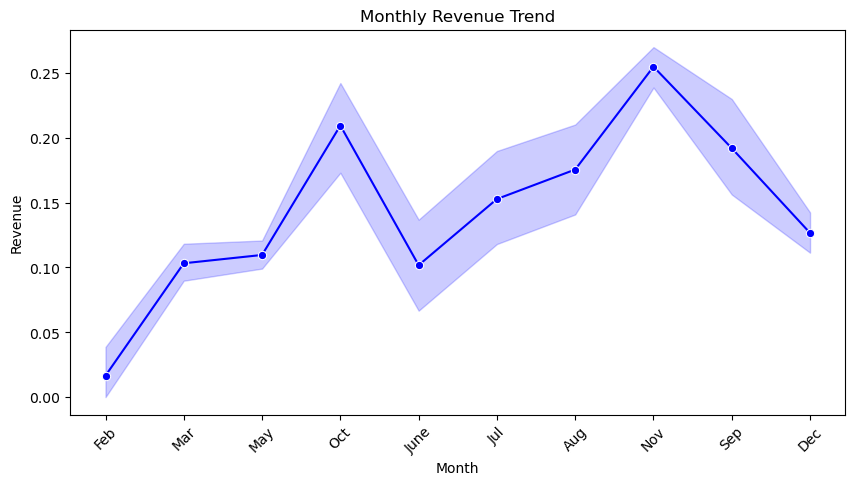

In [262]:
# Line Plot: Monthly Revenue Trendplt.
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month", y="Revenue", data=df3, marker="o", color="b")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()

 #### This plot is a line chart with a shaded confidence interval, visualizing the monthly revenue trend

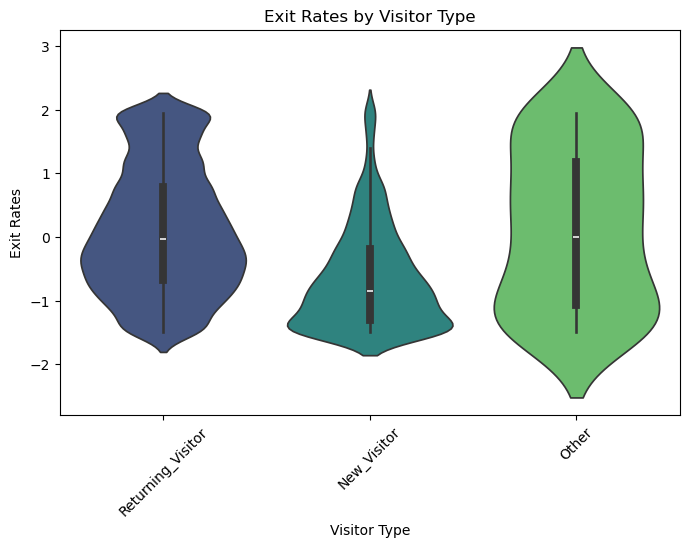

In [264]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="VisitorType", y="ExitRates", data=df3, palette="viridis")
plt.title("Exit Rates by Visitor Type")
plt.xlabel("Visitor Type")
plt.ylabel("Exit Rates")
plt.xticks(rotation=45)
plt.show()

 #### This visualization is a violin plot that shows the distribution of exit rates for different types of website visitors:
 #### The width of each violin indicates the density of data points at different exit rates.
 #### Returning visitors have more consistent exit rates                                                                             

## Encoding

In [267]:
df_encoded = df3.copy() 

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Month', 'VisitorType'],dtype=int)

In [268]:
print(df_encoded['Revenue'].dtypes)

int32


In [269]:
# Verify encoding
print("\nEncoded Data Sample:")
print(df_encoded.head())
df_encoded


Encoded Data Sample:
   Administrative  Administrative_Duration  Informational  \
0       -1.000197                -1.007619      -0.523997   
1       -1.000197                -1.007619      -0.523997   
2       -1.000197                -1.007619      -0.523997   
3       -1.000197                -1.007619      -0.523997   
4       -1.000197                -1.007619      -0.523997   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.494895       -1.721992                -2.092989   
1               -0.494895       -1.721992                -1.159909   
2               -0.494895       -1.721992                -2.092989   
3               -0.494895       -1.721992                -1.907037   
4               -0.494895       -0.511456                 0.027042   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Jul  Month_June  \
0     2.110742   1.954630   -0.533092   -0.337637  ...          0           0   
1    -0.822826   1.620984   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-2.092989,2.110742,1.954630,-0.533092,-0.337637,...,0,0,0,0,0,0,0,0,0,1
1,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-1.159909,-0.822826,1.620984,-0.533092,-0.337637,...,0,0,0,0,0,0,0,0,0,1
2,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-2.092989,2.110742,1.954630,-0.533092,-0.337637,...,0,0,0,0,0,0,0,0,0,1
3,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-1.907037,1.774365,1.862766,-0.533092,-0.337637,...,0,0,0,0,0,0,0,0,0,1
4,-1.000197,-1.007619,-0.523997,-0.494895,-0.511456,0.027042,0.888212,0.784644,-0.533092,-0.337637,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.844197,1.140803,-0.523997,-0.494895,1.056338,0.878282,-0.031621,0.026850,1.918404,-0.337637,...,0,0,0,0,0,0,0,0,0,1
12326,-1.000197,-1.007619,-0.523997,-0.494895,-1.083771,-0.174005,-0.822826,-0.359331,-0.533092,-0.337637,...,0,0,0,0,1,0,0,0,0,1
12327,-1.000197,-1.007619,-0.523997,-0.494895,-0.939492,-0.702867,2.030609,1.480410,-0.533092,-0.337637,...,0,0,0,0,1,0,0,0,0,1
12328,1.044247,0.907613,-0.523997,-0.494895,-0.150893,-0.358570,-0.822826,-0.374789,-0.533092,-0.337637,...,0,0,0,0,1,0,0,0,0,1


## feature selection

In [271]:
df4=df_encoded.copy()
X = df4.drop('Revenue',axis=1)  # Features
y = df4['Revenue']  # Target

# Select top K best features using ANOVA F-value test (for continuous data)
select_k = SelectKBest(score_func=f_classif, k=15)
X_selected = select_k.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[select_k.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Mar',
       'Month_May', 'Month_Nov', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor'],
      dtype='object')


In [272]:
df5=df4[list(selected_features) + ['Revenue']]
df5.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Mar,Month_May,Month_Nov,VisitorType_New_Visitor,VisitorType_Returning_Visitor,Revenue
0,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-2.092989,2.110742,1.954630,-0.533092,-0.337637,0,0,0,0,1,0
1,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-1.159909,-0.822826,1.620984,-0.533092,-0.337637,0,0,0,0,1,0
2,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-2.092989,2.110742,1.954630,-0.533092,-0.337637,0,0,0,0,1,0
3,-1.000197,-1.007619,-0.523997,-0.494895,-1.721992,-1.907037,1.774365,1.862766,-0.533092,-0.337637,0,0,0,0,1,0
4,-1.000197,-1.007619,-0.523997,-0.494895,-0.511456,0.027042,0.888212,0.784644,-0.533092,-0.337637,0,0,0,0,1,0


## Feature scaling

In [274]:
#  define the features (X) and target (y)
X = df5.drop('Revenue',axis=1)
y = df5['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9764, 15) (2441, 15) (9764,) (2441,)


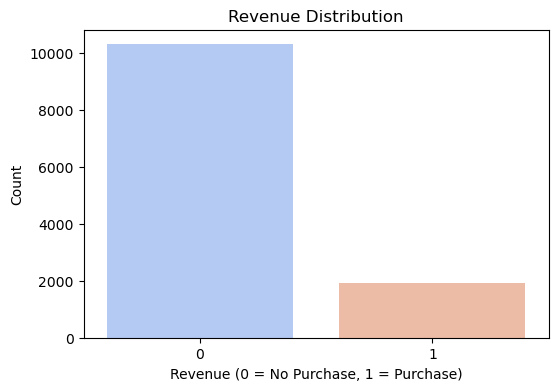

In [275]:
# Count Plot: Revenue Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Revenue", data=df5, palette="coolwarm")
plt.title("Revenue Distribution")
plt.xlabel("Revenue (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Count")
plt.show()

In [276]:
# The target variable is not balanced.So use SMOTE.

In [277]:
# Check original distribution
print("Original Class Distribution:", y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check resampled distribution
print("Resampled Class Distribution:", pd.Series(y_train).value_counts())

Original Class Distribution: Revenue
0    8218
1    1546
Name: count, dtype: int64
Resampled Class Distribution: Revenue
0    8218
1    8218
Name: count, dtype: int64


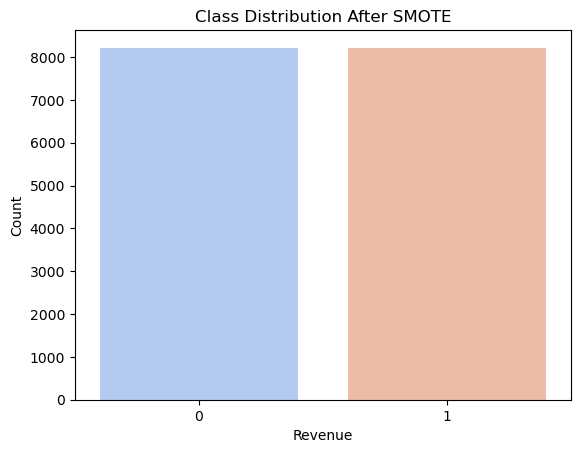

In [278]:
# Convert y_train to Series 
y_train_series = pd.Series(y_train)

# Plot class distribution
sns.countplot(x=y_train_series,palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

In [279]:
scaler = StandardScaler()

# Apply scaling on training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model training

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [282]:
# 1. Initialize all models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree':       DecisionTreeClassifier(random_state=42),
    'Random Forest':       RandomForestClassifier(random_state=42),
    'SVC':                 SVC(probability=True, random_state=42),
    'Naive Bayes':         GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting':   GradientBoostingClassifier(random_state=42)
}


### Model evaluation and Classification Metrics 

In [284]:
# Evaluate each model
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Convert to DataFrame and sort by accuracy
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Display
print(results_df_sorted.reset_index(drop=True))

                 Model  Accuracy  Precision    Recall  F1 Score
0    Gradient Boosting  0.875461   0.559671  0.751381  0.641509
1        Random Forest  0.875051   0.563758  0.696133  0.622991
2  Logistic Regression  0.865629   0.531481  0.792818  0.636364
3                  SVC  0.850881   0.498361  0.839779  0.625514
4        Decision Tree  0.846374   0.485393  0.596685  0.535316
5  K-Nearest Neighbors  0.827939   0.452922  0.770718  0.570552
6          Naive Bayes  0.744777   0.349481  0.837017  0.493084


#### Gradient Boosting emerges as the best-performing model, offering the most balanced trade-off between accuracy, precision, recall, and F1 score, making it the ideal choice for this classification task.

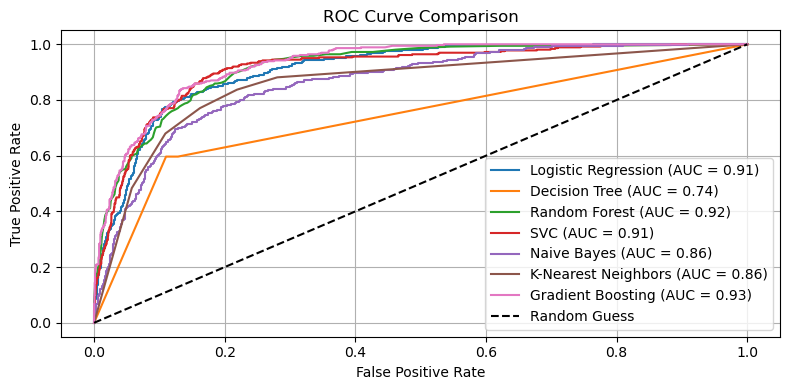

In [286]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 4))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    # Plot ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Gradient Boosting and random forest stands out as the  effective models, offering the highest AUC of 0.93 and 0.92

In [288]:
print("Overfitting Check for Classification Models")


# 1. Logistic Regression (No regularization)
log_reg = LogisticRegression(penalty=None, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
print("\n[Logistic Regression - No Regularization]")
print("Train Accuracy:", accuracy_score(y_train, log_reg.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, log_reg.predict(X_test_scaled)))

# 2. Logistic Regression (Ridge)
log_ridge = LogisticRegression(penalty='l2', max_iter=1000)
log_ridge.fit(X_train_scaled, y_train)
print("\n[Logistic Regression - Ridge (L2)]")
print("Train Accuracy:", accuracy_score(y_train, log_ridge.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, log_ridge.predict(X_test_scaled)))

# 3. Logistic Regression (Lasso)
log_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_lasso.fit(X_train_scaled, y_train)
print("\n[Logistic Regression - Lasso (L1)]")
print("Train Accuracy:", accuracy_score(y_train, log_lasso.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, log_lasso.predict(X_test_scaled)))

# 4. Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)
print("\n[Decision Tree]")
print("Train Accuracy:", accuracy_score(y_train, dec_tree.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, dec_tree.predict(X_test_scaled)))

# 5. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
print("\n[Random Forest]")
print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, rf.predict(X_test_scaled)))

# 6. SVC
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
print("\n[Support Vector Classifier (SVC)]")
print("Train Accuracy:", accuracy_score(y_train, svc.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, svc.predict(X_test_scaled)))

# 7. Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
print("\n[Naive Bayes]")
print("Train Accuracy:", accuracy_score(y_train, nb.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, nb.predict(X_test_scaled)))

# 8. K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("\n[K-Nearest Neighbors]")
print("Train Accuracy:", accuracy_score(y_train, knn.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, knn.predict(X_test_scaled)))

# 9. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
print("\n[Gradient Boosting]")
print("Train Accuracy:", accuracy_score(y_train, gb.predict(X_train_scaled)))
print("Test Accuracy :", accuracy_score(y_test, gb.predict(X_test_scaled)))

Overfitting Check for Classification Models

[Logistic Regression - No Regularization]
Train Accuracy: 0.8489291798491118
Test Accuracy : 0.8656288406390823

[Logistic Regression - Ridge (L2)]
Train Accuracy: 0.8489900219031394
Test Accuracy : 0.8656288406390823

[Logistic Regression - Lasso (L1)]
Train Accuracy: 0.848868337795084
Test Accuracy : 0.8660385088078656

[Decision Tree]
Train Accuracy: 0.9998174738379167
Test Accuracy : 0.8463744367062679

[Random Forest]
Train Accuracy: 0.9998174738379167
Test Accuracy : 0.8750512085210979

[Support Vector Classifier (SVC)]
Train Accuracy: 0.8739352640545145
Test Accuracy : 0.850880786562884

[Naive Bayes]
Train Accuracy: 0.7841932343635921
Test Accuracy : 0.7447767308480131

[K-Nearest Neighbors]
Train Accuracy: 0.9280846921392066
Test Accuracy : 0.8279393691110201

[Gradient Boosting]
Train Accuracy: 0.9008882939888051
Test Accuracy : 0.8754608766898812


# Cross validation

In [290]:
from sklearn.model_selection import cross_val_score
models1 = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Perform cross-validation
for name, model in models1.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}")
    print("Fold Accuracies:", np.round(scores, 4))
    print("Mean Accuracy  :", round(scores.mean(), 4))
    print("Standard Deviation:", round(scores.std(), 4))
    print()

Decision Tree
Fold Accuracies: [0.8339 0.8917 0.8993 0.8923 0.8902]
Mean Accuracy  : 0.8815
Standard Deviation: 0.024

Random Forest
Fold Accuracies: [0.9048 0.9291 0.9315 0.9276 0.9319]
Mean Accuracy  : 0.925
Standard Deviation: 0.0102

K-Nearest Neighbors
Fold Accuracies: [0.8954 0.8929 0.896  0.8941 0.9023]
Mean Accuracy  : 0.8961
Standard Deviation: 0.0033



#### RandomForest is the best performing model with the highest average accuracy (93.15%)

# Hyperparameter tuning

In [293]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10]
}

# Run randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit on scaled data
random_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

    

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': None}


# Pipeline building

In [295]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
pipeline = imbpipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(**best_params, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=150, random_state=42))])

In [296]:
# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Trained data accuracy score:", accuracy_score(y_train, y_train_pred))
print("Test data accuracy score:", accuracy_score(y_test, y_test_pred))

Trained data accuracy score: 0.9998174738379167
Test data accuracy score: 0.8738222040147481


# Model saving

In [298]:
import joblib

In [299]:
# Save the model
joblib.dump(pipeline, "online_shoppers_model.pkl")
print("Model saved successfully")


Model saved successfully


# Unseen data check

In [331]:
pipeline = joblib.load("online_shoppers_model.pkl")

In [329]:
# Load the dataset
unseen_df = pd.read_csv("C:\\Users\\user\\Desktop\\online_shoppers_unseendata.csv")
unseen_df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,2,9.0,1,0.0,106,6617.791228,0.009048,0.026412,1.777493,0,Nov,3,2,1,1,Returning_Visitor,True,True
1,0,0.0,2,65.5,4,71.500000,0.000000,0.033333,0.000000,0,Nov,2,2,1,11,Returning_Visitor,True,False
2,2,67.5,0,0.0,7,393.500000,0.000000,0.025000,0.000000,0,Dec,2,2,1,2,New_Visitor,False,False
3,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0,Nov,2,2,9,2,New_Visitor,False,False
4,0,0.0,0,0.0,3,0.000000,0.200000,0.200000,0.000000,0,Nov,3,2,4,3,Returning_Visitor,True,False


In [333]:
categorical_columns=unseen_df.select_dtypes(include=["object","category"]).columns.tolist()
numerical_columns = unseen_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:\n", categorical_columns)
print("\nNumerical Columns:\n", numerical_columns)

Categorical Columns:
 ['Month', 'VisitorType']

Numerical Columns:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [335]:
# Apply One-Hot Encoding
df = pd.get_dummies(unseen_df, columns=['Month', 'VisitorType'],dtype=int)

In [337]:
# Verify encoding
print("\nEncoded Data Sample:")
print(df.head())
df


Encoded Data Sample:
   Administrative  Administrative_Duration  Informational  \
0               2                      9.0              1   
1               0                      0.0              2   
2               2                     67.5              0   
3               4                     37.5              2   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             106              6617.791228   
1                    65.5               4                71.500000   
2                     0.0               7               393.500000   
3                    82.0               4                96.625000   
4                     0.0               3                 0.000000   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0     0.009048   0.026412    1.777493           0                 3        2   
1     0.000000   0.033333    0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Nov,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,2,9.000000,1,0.000,106,6617.791228,0.009048,0.026412,1.777493,0,3,2,1,1,True,True,0,1,0,1
1,0,0.000000,2,65.500,4,71.500000,0.000000,0.033333,0.000000,0,2,2,1,11,True,False,0,1,0,1
2,2,67.500000,0,0.000,7,393.500000,0.000000,0.025000,0.000000,0,2,2,1,2,False,False,1,0,1,0
3,4,37.500000,2,82.000,4,96.625000,0.000000,0.017500,0.000000,0,2,2,9,2,False,False,0,1,1,0
4,0,0.000000,0,0.000,3,0.000000,0.200000,0.200000,0.000000,0,3,2,4,3,True,False,0,1,0,1
5,9,181.275000,2,65.000,120,3283.715359,0.004651,0.024543,2.442153,0,1,2,1,2,False,False,0,1,0,1
6,0,0.000000,0,0.000,5,62.750000,0.000000,0.040000,0.000000,0,2,2,6,2,True,False,1,0,0,1
7,0,0.000000,0,0.000,12,292.875000,0.000000,0.028333,0.000000,0,4,2,3,2,True,False,0,1,0,1
8,0,0.000000,0,0.000,37,2296.250000,0.000000,0.014865,0.000000,0,2,2,1,13,False,False,0,1,0,1
9,4,59.200000,0,0.000,5,38.358333,0.000000,0.043915,0.000000,0,3,2,8,2,False,False,1,0,0,1


In [339]:
Selected_Features=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Mar',
       'Month_May', 'Month_Nov', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor']

In [341]:
# training_df = pd.read_csv("C:\\Users\\user\\Desktop\\online_shoppers_unseendata.csv")  # Provide the path to the training dataset
# training_dummies = pd.get_dummies(training_df, columns=['Month', 'VisitorType'], dtype=int)
X_unseen_data= df.reindex(columns=Selected_Features, fill_value=0)



In [353]:

# Separate target and features
X = df.drop(columns=['Revenue'], axis=1) 
y = df['Revenue']

# # Standardize numerical features
# scaler = StandardScaler()
# X[numerical_columns] = scaler.fit_transform(X[numerical_columns])



In [355]:
# Predict class
predictions = pipeline.predict(X_unseen_data)

# Predict probabilities if you want
probabilities = pipeline.predict_proba(X_unseen_data)

# Add predictions to the DataFrame
unseen_df['predicted_revenue'] = predictions
unseen_df['probability'] = probabilities[:, 1]  # Probability of class '1' (revenue)


In [357]:
y_true = unseen_df['Revenue']  # actual target
y_pred = unseen_df['predicted_revenue']  #  model's prediction

In [359]:
# Accuracy check
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on unseen data: {accuracy:.2f}")

Accuracy on unseen data: 0.56


In [361]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predictions))


              precision    recall  f1-score   support

       False       0.79      0.59      0.68        39
        True       0.24      0.45      0.31        11

    accuracy                           0.56        50
   macro avg       0.52      0.52      0.49        50
weighted avg       0.67      0.56      0.60        50



# Conclusion
In this project, we aimed to predict whether an online shopper will make a purchase based on their browsing behavior and session characteristics.

After preprocessing the data, selecting key features, and handling class imbalance using SMOTE, we trained a classification model and evaluated its performance on unseen data.
 
#### Key Findings:

The model achieved an accuracy of 56% on unseen data.

It performed better on the majority class (non-purchasing users) with a precision of 0.79 and recall of 0.59.

However, the performance on the minority class (purchasing users) was significantly lower, with a precision of 0.24 and recall of 0.45.

This indicates that while the model captures general browsing patterns, it struggles to identify actual purchasing behavior effectively.